In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

# Analyzation of the data

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
df_train.describe()

/Users/ahmetcanozbek/anaconda/envs/qs/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Gender

In [5]:
# Let's look at genders
n_male = (df_train['Sex'] == 'male').sum()
n_female = (df_train['Sex'] == 'female').sum()

In [6]:
n_male_survivors = ((df_train['Survived'] == 1) & (df_train['Sex'] == 'male')).sum()
n_female_survivors = ((df_train['Survived'] == 1) & (df_train['Sex'] == 'female')).sum()
print 'n_male_survivors:', n_male_survivors
print 'n_female_survivors:', n_female_survivors

n_male_survivors: 109
n_female_survivors: 233


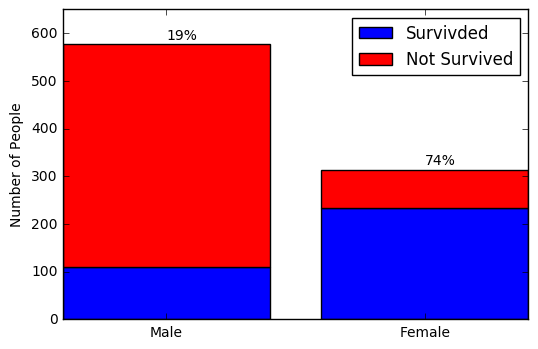

In [7]:
# Plot
ind = np.arange(2)
width = 0.8
bar_data = (n_male_survivors, n_female_survivors)
bar_data_2 = (n_male - n_male_survivors, n_female - n_female_survivors)
plt.bar(ind, bar_data, color='b', width=width)
plt.bar(ind, bar_data_2, bottom= bar_data, color='r', width=width)
plt.xticks((ind + width/2),('Male','Female'))
plt.legend(('Survivded','Not Survived'))
plt.ylabel('Number of People')
plt.ylim([0,650])
r_male_survivors = n_male_survivors / float(n_male)
r_female_survivors = n_female_survivors / float(n_female)
plt.text(ind[0] + width/2, bar_data[0] + bar_data_2[0] + 10, str(int(round(r_male_survivors * 100))) + '%')
plt.text(ind[1] + width/2, bar_data[1] + bar_data_2[1] + 10, str(int(round(r_female_survivors * 100))) + '%')
plt.show()

## Gender and Age
I will analyze the age distribution of the females by survived or not survived

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


It looks like we have some missing data in the age column, we should fix that before moving on

In [9]:
female_age_survived = df_train[(df_train['Sex'] == 'female') & (df_train['Survived'] == 1)]['Age']
female_age_not_survived = df_train[(df_train['Sex'] == 'female') & (df_train['Survived'] == 0)]['Age']
# Drop NaNs
female_age_survived =  female_age_survived.dropna()
female_age_not_survived = female_age_not_survived.dropna()

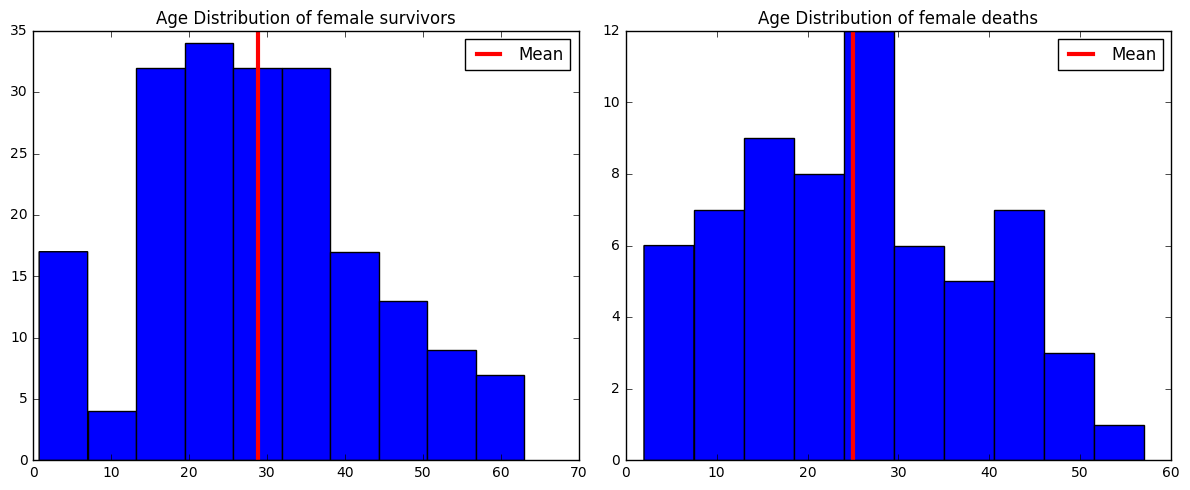

In [10]:
# Plot
fig = plt.figure()
fig.set_size_inches(12,5)
plt.subplot(1,2,1); plt.hist(female_age_survived); plt.title('Age Distribution of female survivors')
plt.axvline(x=female_age_survived.mean(), color='red', linewidth=3);
plt.legend(('Mean',))

plt.subplot(1,2,2); plt.hist(female_age_not_survived); plt.title('Age Distribution of female deaths')
plt.axvline(x=female_age_not_survived.mean(), color='red', linewidth=3);
plt.legend(('Mean',))

plt.tight_layout()
plt.show()

# Classification